# Big Contest

## Single

****

## 1. Package Import

In [1]:
# Data Wrangling
import pandas as pd
import numpy as np
import re

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='malgun gothic')
rc('axes', unicode_minus=False)
%matplotlib inline

# Settings
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
from scipy.stats import skew

****

## 2. Load Data

In [92]:
data = pd.read_excel('2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터.xlsx', header = 1) # train
test = pd.read_excel("2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx", header = 1) # test

In [34]:
data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   21525 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [119]:
test.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN


****

## 3. Data Wrangling



* Target = '취급액'

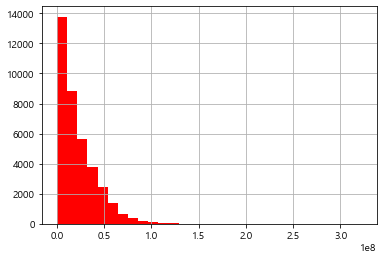

Target 값인 취급액의 분산은 : 407692796704447.56이고 왜도는 1.814이다.


In [36]:
data.취급액.hist(color = 'r', bins = 30)
plt.show()
print('Target 값인 취급액의 분산은 : {}이고 왜도는 {}이다.'.format(np.round(data.취급액.var(), 3), np.round(data.취급액.skew(), 3)))

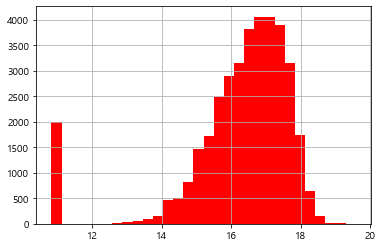

Target 값인 취급액의 분산은 : 2.58이고 왜도는 -1.968이다.


In [37]:
np.log1p(data.취급액).hist(color = 'r', bins = 30)
plt.show()
print('Target 값인 취급액의 분산은 : {}이고 왜도는 {}이다.'.format(np.round(np.log1p(data.취급액).var(), 3), np.round(np.log1p(data.취급액).skew(), 3)))

#### 실제 문제에서 주어진 예측 값은 '취급액'이지만 해당 변수의 분산과 왜도가 크다고 판단하여 '판매량' = '취급액' / '판매단가'의 식으로부터 New Target인 판매량을 예측하는 문제로 접근

* New Target인 판매량의 통계량 비교

In [163]:
data['판매량'] = data.취급액 / data.판매단가

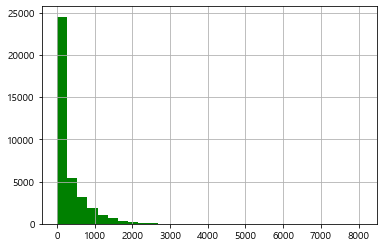

Target 값인 판매량의 분산은 : 178275.721이고 왜도는 2.54이다.


In [39]:
data.판매량.hist(color = 'g', bins = 30)
plt.show()
print('Target 값인 판매량의 분산은 : {}이고 왜도는 {}이다.'.format(np.round(data.판매량.var(), 3), np.round(data.판매량.skew(), 3)))

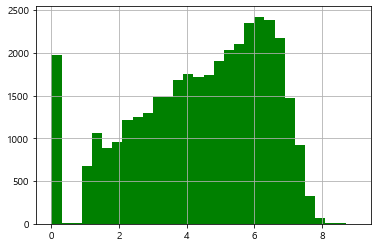

Target 값인 판매량의 분산은 : 3.941이고 왜도는 -0.5이다.


In [40]:
np.log1p(data.판매량).hist(color = 'g', bins = 30)
plt.show()
print('Target 값인 판매량의 분산은 : {}이고 왜도는 {}이다.'.format(np.round(np.log1p(data.판매량).var(), 3), np.round(np.log1p(data.판매량).skew(), 3)))

#### New Target인 '판매량' 예측 문제가 통계적으로 적합하다고 판단하여 판매량을 예측한 후 해당 제품의 판매단가를 곱하여 최종적으로 취급액을 예측하는 문제로 전환하였다.

In [41]:
print('첫 방송일시는 {} 마지막 방송일시는 {}'.format(data.방송일시.min(), data.방송일시.max()))

첫 방송일시는 2019-01-01 06:00:00 마지막 방송일시는 2020-01-01 01:40:00


### 3-1) NA Values

In [93]:
data = data.loc[(data.상품군 != '무형') & (data.취급액 != 50000)].fillna(0) # 상품군이 무형이고 취급액이 50000인 데이터는 제외
data = data.loc[data.취급액 != 0] ### 취급액이 50000이었다가 0이 된 데이터 삭제
data.index = range(data.shape[0]) ### 인덱스 재설정

In [110]:
exposure_zero = data.loc[data['노출(분)'] == 0].drop('노출(분)', axis = 1)
exposure_zero.fillna(20, inplace = True)

In [112]:
exposure_nonzero = data.loc[data['노출(분)'] != 0]

In [113]:
exposure_zero = pd.merge(exposure_zero, exposure_nonzero[['방송일시', '노출(분)']], how = 'left', on = '방송일시')

In [114]:
data = pd.concat([exposure_zero, exposure_nonzero], axis = 0, ignore_index = True).fillna(20)

#### 3-2) 파생변수

In [131]:
data.방송일시 = pd.to_datetime(data.방송일시)

In [143]:
data['방송월'] = data.방송일시.dt.month

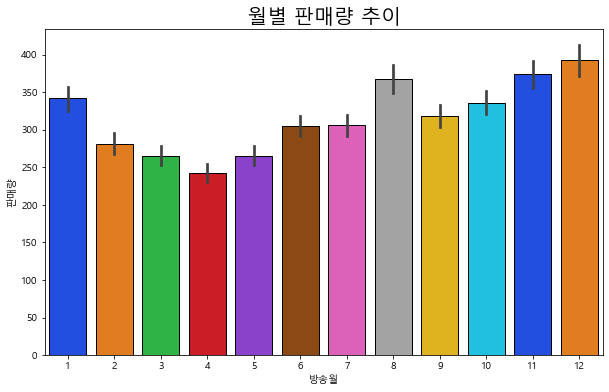

In [173]:
plt.figure(figsize = (10, 6))
plt.title("월별 판매량 추이", size = 20)
sns.barplot(data.방송월, data.판매량, edgecolor = (0,0,0), palette = 'bright')
plt.show()

#### 월별 판매량 추이를 살펴본 결과 연말(11, 12월), 설 전(1월), 추석 및 휴가철(8월)에 판매량이 높은 것을 알 수 있다.

In [134]:
def season(x):
    if x in ['01', '02', '12'] :
        return '겨울'
    elif x in ['03', '04', '05'] :
        return '봄'
    elif x in ['06', '07', '08'] :
        return '여름'
    else :
        return '가을'

In [135]:
data['방송계절'] = data.방송월.apply(season)

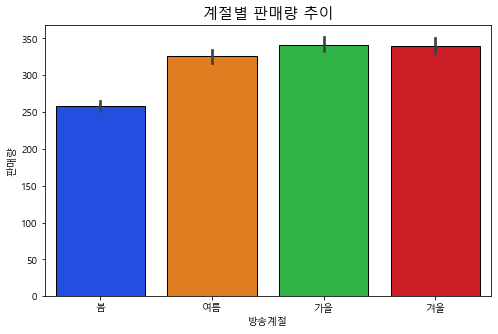

In [175]:
plt.figure(figsize = (8, 5))
plt.title("계절별 판매량 추이", size = 15)
sns.barplot(data.방송계절, data.판매량, edgecolor = (0,0,0), palette = 'bright', order = ['봄','여름','가을','겨울'])
plt.show()

#### 봄(3월 ~ 5월)이 판매량이 가장 적은 것을 알 수 있고 겨울(12월 ~ 2월)로 갈 수록 판매량이 많아지는 것을 알 수 있다.

In [139]:
data['분기'] = data.방송일시.dt.quarter

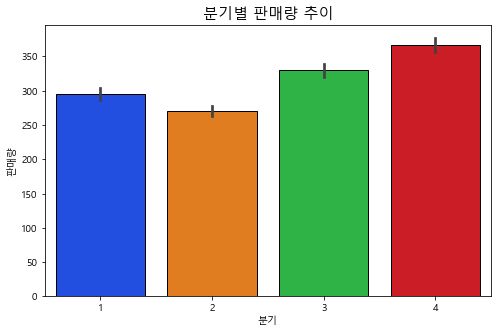

In [178]:
plt.figure(figsize = (8, 5))
plt.title("분기별 판매량 추이", size = 15)
sns.barplot(data.분기, data.판매량, edgecolor = (0,0,0), palette = 'bright')
plt.show()

#### 방송분기별 판매량을 살펴본 결과 연말로 갈수록 판매량이 급증하는 것을 알 수 있다.

In [142]:
data['방송시간'] = data.방송일시.dt.hour

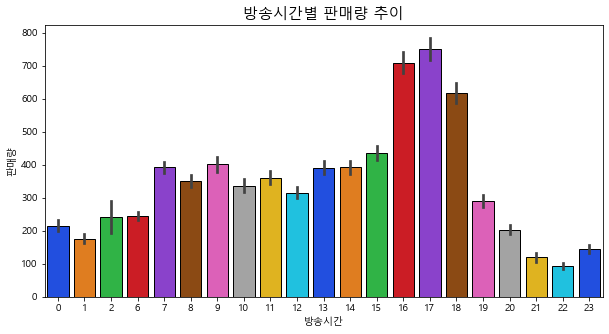

In [181]:
plt.figure(figsize = (10, 5))
plt.title("방송시간별 판매량 추이", size = 15)
sns.barplot(data.방송시간, data.판매량, edgecolor = (0,0,0), palette = 'bright')
plt.show()

In [144]:
data['방송주차'] = data.방송일시.dt.weekofyear

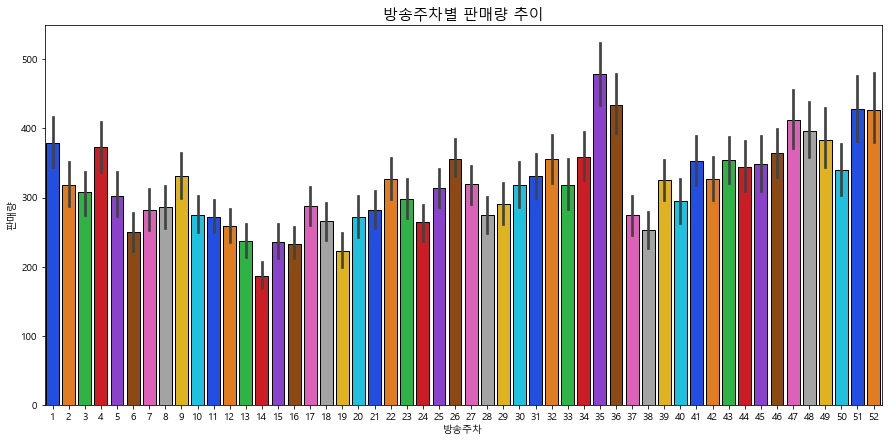

In [183]:
plt.figure(figsize = (15, 7))
plt.title("방송주차별 판매량 추이", size = 15)
sns.barplot(data.방송주차, data.판매량, edgecolor = (0,0,0), palette = 'bright')
plt.show()

In [210]:
data.loc[data.방송주차 == 35].방송날짜.unique()

array(['2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
       '2019-08-30', '2019-08-31', '2019-09-01'], dtype=object)

#### 방송주차별 판매량 추이를 살펴본 결과 35주차(8/26 ~ 9/1)에 가장 많은 판매량을 기록한 것을 알 수 있다. 배송기간을 고려했을 때 추석 전에 물품을 많이 구매한 것으로 추측할 수 있다.

In [149]:
data['방송요일'] = data.방송일시.dt.day_name()

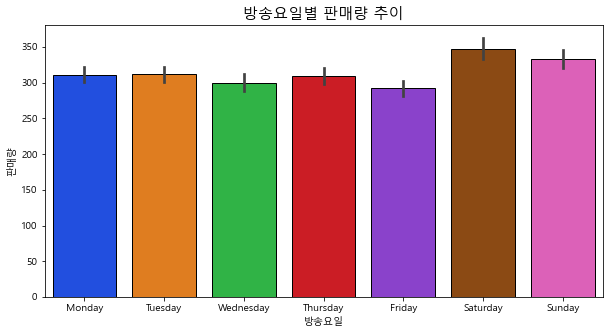

In [187]:
plt.figure(figsize = (10, 5))
plt.title("방송요일별 판매량 추이", size = 15)
sns.barplot(data.방송요일, data.판매량, edgecolor = (0,0,0), palette = 'bright', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])
plt.show()

#### 방송요일별 판매량을 살펴본 결과 주말(토, 일)이 판매량이 압도적으로 높은 것을 알 수 있다.

In [157]:
data['주말'] = [1 if x in ['Saturday', 'Sunday'] else 0 for x in data.방송요일]

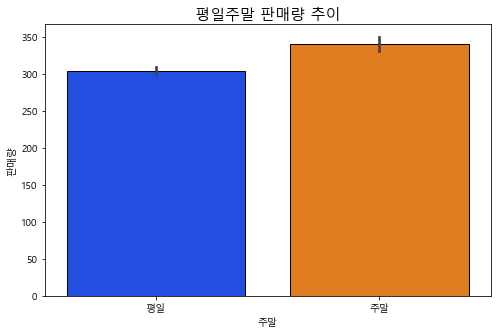

In [191]:
plt.figure(figsize = (8, 5))
plt.title("평일주말 판매량 추이", size = 15)
sns.barplot(data.주말, data.판매량, edgecolor = (0,0,0), palette = 'bright')
plt.xticks([0, 1], ['평일','주말'])
plt.show()

In [151]:
def 일시불_무이자(x):
    if '일시불' in x :
        return '일시불'
    elif x.startswith('일)'):
        return '일시불'
    elif '(일)' in x :
        return '일시불'
    elif '무이자' in x :
        return '무이자'
    elif x.startswith('무)'):
        return '무이자'
    elif '(무)' in x :
        return '무이자'
    else :
        return '해당없음'

In [152]:
data['일시불무이자'] = data.상품명.apply(일시불_무이자)

In [153]:
def set_pack(x):
    if '세트' in x :
        return 1
    elif '패키지' in x :
        return 1
    elif '+' in x:
        return 1
    elif len(re.findall('[0-9]+종', x)) > 0 and re.findall('[0-9]+종', x)[0] != '1종':
        return 1
    else :
        return 0

In [154]:
data['구성'] = data.상품명.apply(set_pack)

In [155]:
def m_or_f(x):
    if '여성' in x or '브라' in x or '란쥬' in x or '블라우스' in x or '밍크' in x or '립스틱' in x or '퍼 베스트' in x or '원피스' in x or '귀걸이' in x or '목걸이' in x or '반지' in x or '팔찌' in x or '고데기' in x :
        return '여성'
    elif '남성' in x or '면도' in x :
        return '남성'
    else :
        return '해당없음'

In [156]:
data['성별'] = data.상품명.apply(m_or_f)

In [159]:
data['상품명'] = data['상품명'].apply(lambda x :x.upper())

In [193]:
def brand(x):
    if ('장수 흙' in x) or ('장수흙' in x) or ('장수' in x) :
        return '장수'
    elif '한샘' in x:
        return '한샘'
    elif '푸마' in x :
        return '푸마'
    elif '삼익' in x :
        return '삼익'
    elif '보루네오' in x :
        return '보루네오'
    elif 'LG' in x :
        return 'LG'
    elif '삼성' in x :
        return '삼성'
    elif '로베르타' in x :
        return '로베르타'
    elif '딤채' in x :
        return '딤채'
    elif '루에띠에' in x :
        return '루이띠에'
    elif '헤스티지' in x :
        return '헤스티지'
    elif '구찌' in x :
        return '구찌'
    elif '그렉노먼' in x :
        return '그렉노먼'
    elif '노송' in x :
        return '노송'
    elif '도스문도스' in x :
        return '도스문도스'
    elif '레이프릴' in x :
        return '레이프릴'
    elif '루이띠에' in x :
        return '루이띠에'
    elif '마르엘라로사티' in x :
        return '마르엘라로사티'
    elif '마리끌레르' in x :
        return '마리끌레르'
    elif '대우' in x :
        return '대우'
    elif '프라다' in x :
        return '프라다'
    elif '알비에로' in x :
        return '알비에로'
    elif '뉴트리원' in x :
        return '뉴트리원'
    elif '가이거' in x :
        return '가이거'
    elif '오슬로' in x :
        return '오슬로'
    elif '알비에로' in x :
        return '알비에로'
    elif '메디아글램' in x :
        return '메디아글램'
    elif '블랙모어스' in x :
        return '블랙모어스'
    elif '일월' in x :
        return '일월'
    elif (('크로커다일' in x) & ('팬티' in x )) | (('크로커다일' in x) & ('브라' in x )) :
        return '크로커다일'
    elif '한솔' in x :
        return '한솔'
    elif '쿠쿠' in x :
        return '쿠쿠'
    elif '안드레아바나' in x :
        return '안드레아바나'
    elif '모나코사놀' in x :
        return '뉴트리원'
    elif '이누스바스' in x :
        return '이누스바스'
    elif '라니' in x :
        return '라니'
    elif '엘렌실라' in x :
        return '엘렌실라'
    elif '헤드' in x :
        return '헤드'
    elif '올리고' in x :
        return '올리고'
    elif '종근당' in x :
        return '종근당'
    elif '쿠첸' in x :
        return '쿠첸'
    elif '보국' in x :
        return '보국'
    elif '디즈니' in x :
        return '디즈니'
    elif 'USPA' in x :
        return 'USPA'
    elif '마리노블' in x :
        return '마리노블'
    elif '기라로쉬' in x :
        return '기라로쉬'
    elif '엘리자베스아덴' in x :
        return '엘리자베스아덴'
    elif '글라스락' in x :
        return '글라스락'
    elif 'AHC' in x :
        return 'AHC'
    elif ('BBC' in x) & ('IZUMI' in x) :
        return 'BBC_IZUMI'
    elif 'CERINI BY PAT' in x :
        return 'CERINI_BY_PAT'
    elif 'EXR' in x :
        return 'EXR'
    elif 'K-SWISS' in x :
        return 'K-SWISS'
    elif 'LSX' in x :
        return 'LSX'
    elif 'NNF' in x :
        return 'NNF'
    elif 'SK' in x :
        return 'SK'
    elif 'RYN' in x :
        return 'RYN'
    elif ('광동' in x) | ('피부약방' in x ) :
        return '광동제약'
    elif '농협' in x :
        return '농협'
    elif '본죽' in x :
        return '본죽'
    elif '페플럼제이' in x :
        return '페플럼제이'
    elif '플로쥬' in x :
        return '플로쥬'
    elif '경남제약' in x :
        return '경남제약'
    elif '구찌' in x :
        return '구찌'
    elif '굿프렌드' in x :
        return '굿프렌드'
    elif '까사마루' in x :
        return '까사마루'
    elif '남영비비안' in x :
        return '남영비비안'
    elif '네오젠' in x :
        return '네오젠'
    elif '네페르티티' in x :
        return '네페르티티'
    elif '노비타' in x :
        return '노비타'
    elif '노와' in x :
        return '노와'
    elif '클레린' in x :
        return '클레린'
    elif '벨라홈' in x :
        return '벨라홈'
    elif '뉴욕맘' in x :
        return '뉴욕맘'
    elif '닥터' in x :
        return 'HL사이언스'
    elif '대동모피' in x :
        return '대동모피'
    elif '대웅모닝컴' in x :
        return '대웅모닝컴'
    elif '댄스킨' in x :
        return '댄스킨'
    elif '더블모 ' in x :
        return '더블모'
    elif '더블유베일' in x :
        return '더블유베일'
    elif '델첸' in x :
        return '델첸'
    elif '도네이' in x :
        return '도네이'
    elif '도루코' in x :
        return '도루코'
    elif '두꺼비 매직' in x :
        return '두꺼비'
    elif '디비노' in x :
        return '디비노'
    elif '디키즈' in x :
        return '디키즈'
    elif '디베이지' in x :
        return '디베이지'
    elif '라라쎄' in x :
        return '라라쎄'
    elif '라라츄' in x :
        return '라라츄'
    elif '락앤락' in x :
        return '락앤락'
    elif '란체티' in x :
        return '란체티'
    elif '램프쿡' in x :
        return '램프쿡'
    elif '라쉬반' in x :
        return '라쉬반'
    elif '레노마' in x :
        return '레노마'
    elif '레드캠프' in x :
        return '레드캠프'
    elif '레스토닉' in x :
        return '레스토닉'
    elif '레코바' in x :
        return '레코바'
    elif '로벤탈' in x :
        return '로벤탈'
    elif '롯데' in x :
        return '롯데'
    elif '르까프' in x :
        return '르까프'
    elif '리복' in x :
        return '리복'
    elif '리앤' in x :
        return '리앤'
    elif '마담팰리스' in x :
        return '마담팰리스'
    elif '마모트' in x :
        return '마모트'
    elif '마스케라' in x :
        return '마스케라'
    elif '마이클코어스' in x :
        return '마이클코어스'
    elif '멋진밥상' in x :
        return '멋진밥상'
    elif '메디앤서' in x :
        return '메디앤서'
    elif '메시제이' in x :
        return '메시제이'
    elif '메이듀' in x :
        return '메이듀'
    elif '목우촌' in x :
        return '목우촌'
    elif '몬테밀라노' in x :
        return '몬테밀라노'
    elif '자미코코' in x :
        return '자미코코'
    elif '린나이' in x :
        return '린나이'
    elif '모즈' in x :
        return '모즈'
    elif '아이넥스' in x :
        return '아이넥스'
    elif '뱅뱅' in x :
        return '뱅뱅'
    elif '보몽드' in x :
        return '보몽드'
    elif '보코' in x :
        return '보코'
    elif '뷰티플렉스' in x :
        return '뷰티플렉스'
    elif '비버리힐스폴로클럽' in x :
        return '비버리힐스폴로클럽'
    elif '사운드룩' in x :
        return '사운드룩'
    elif '삭루츠' in x :
        return '삭루츠'
    elif ('생쥴랑' in x) | ('생줄랑' in x ) :
        return '생쥴랑'
    elif '스칸디나비아' in x :
        return '스칸디나비아'
    elif '스프리스' in x :
        return '스프리스'
    elif '세인트스코트' in x :
        return '세인트스코트'
    elif '센스톰' in x :
        return '센스톰'
    elif '센스톰' in x :
        return
    elif '셀렉프로' in x :
        return '셀렉프로'
    elif '셰프웨이' in x :
        return '셰프웨이'
    elif '소들녘' in x :
        return '소들녘'
    elif '시스마르스' in x :
        return '시스마르스'
    elif '스칼프솔루션' in x :
        return '스칼프솔루션'
    elif '스텔라테일러' in x :
        return '스텔라테일러'
    elif '스튜디오럭스' in x :
        return '스튜디오럭스'
    elif '스포메틱스' in x :
        return '스포메틱스'
    elif '스피드랙' in x :
        return '스피드랙'
    elif '실바트' in x :
        return '실바트'
    elif '실크트리' in x :
        return '실크트리'
    elif '썸덱스' in x :
        return '썸덱스'
    elif '쓰임' in x :
        return '쓰임'
    elif '아가타' in x :
        return '아가타'
    elif '아르테사노' in x :
        return '아르테사노'
    elif '아리스토우' in x :
        return '아리스토우'
    elif '아문센' in x :
        return '아문센'
    elif '아미니' in x :
        return '아미니'
    elif '아이넥스' in x :
        return '아이넥스'
    elif '아키' in x :
        return '아키'
    elif '알렉스하운드' in x :
        return '알렉스하운드'
    elif '에델코첸' in x :
        return '에델코첸'
    elif '에르나벨' in x :
        return '에르나벨'
    elif '에버라스트' in x :
        return '에버라스트'
    elif '에코라믹' in x :
        return '에코라믹'
    elif '에트로' in x :
        return '에트로'
    elif '에펨' in x :
        return '에펨'
    elif '메르시' in x :
        return '메르시'
    elif '오가닉뷰티' in x :
        return '오가닉뷰티'
    elif '오델로' in x :
        return '오델로'
    elif '오렐리안' in x :
        return '오렐리안'
    elif '오모떼' in x :
        return '오모떼'
    elif '월드컵' in x :
        return '월드컵'
    elif '유캐슬' in x :
        return '유캐슬'
    elif '제옥스' in x :
        return '제옥스'
    elif '칼리베이직' in x :
        return '칼리베이직'
    elif '코몽트' in x :
        return '코몽트'
    elif '코튼플러스' in x :
        return '코튼플러스'
    elif '코펜하겐럭스' in x :
        return '코펜하겐럭스'
    elif '키친아트' in x :
        return '키친아트'
    elif '키친플라워' in x :
        return '키친플라워'
    elif '타운젠트' in x :
        return '타운젠트'
    elif '트라이' in x :
        return '트라이'
    elif '트레스패스' in x :
        return '트레스패스'
    elif '팜스프링스' in x :
        return '팜스프링스'
    elif '한빛' in x :
        return '한빛'
    elif '해피콜' in x :
        return '해피콜'
    elif '히트융' in x :
        return '히트융'
    elif '카파' in x :
        return '카파'
    elif '휴테크' in x :
        return '휴테크'
    elif '효재' in x :
        return '효재'
    elif '헤비추얼' in x :
        return '헤비추얼'
    elif '피시원' in x :
        return '피시원'
    elif '페르소나' in x :
        return '페르소나'
    elif '파뷔에' in x :
        return '파뷔에'
    elif '파로마' in x :
        return '파로마'
    elif '테이트' in x :
        return '테이트'
    elif '크리스티나앤코' in x :
        return '크리스티나앤코'
    elif '쿠미투니카' in x :
        return '쿠미투니카'
    elif '코치 ' in x :
        return '코치'
    elif '컬럼비아' in x :
        return '컬럼비아'
    elif '청정수산' in x :
        return '청정수산'
    elif '젠트웰' in x :
        return '젠트웰'
    elif '임페리얼' in x :
        return '임페리얼'
    elif '강레오' in x :
        return '강레오'
    elif '이봉원' in x :
        return '이봉원'
    elif '이정섭' in x :
        return '이정섭'
    elif '이동수' in x :
        return '이동수'
    elif '이경제' in x :
        return '이경제'
    elif '유귀열' in x :
        return '유귀열'
    elif '오세득' in x :
        return '오세득'
    elif '송도순' in x :
        return '송도순'
    elif '하림' in x :
        return '하림'
    elif '김병만' in x :
        return '김병만'
    elif '김병지' in x :
        return '김병지'
    elif '김선영' in x :
        return '김선영'
    elif '김정문' in x :
        return '김정문'
    elif '김정배' in x :
        return '김정배'
    elif '팽현숙' in x :
        return '팽현숙'
    elif 'PN풍년' in x :
        return '원팟'
    elif '루미테라피' in x :
        return '루미테라피'
    elif'리큅' in x :
        return '리큅'
    elif '매직쉐프' in x :
        return '매직쉐프'
    elif '마이베비' in x :
        return '마이베비'
    elif '메디쉴드' in x :
        return '메디쉴드'
    elif '메디컬드림' in x :
        return '메디컬드림'
    elif '밸런스파워' in x :
        return '밸런스파워'
    elif '브람스' in x :
        return '브람스'
    elif '선일금고'in x :
        return '선일금고'
    elif '센스락' in x :
        return '센스락'
    elif '비앙코' in x :
        return '비앙코'
    elif '스위스밀리터리' in x :
        return '스위스밀리터리'
    elif '실리만' in x :
        return '실리만'
    elif '아이오 ' in x :
        return '아이오'
    elif '에버홈' in x :
        return '에버홈'
    elif '에지리' in x :
        return '에지리'
    elif '에코바이런' in x :
        return '에코바이런'
    elif '오스터' in x :
        return '오스터'
    elif '드럼쿡' in x :
        return '드럼쿡'
    elif ('캐리어' in x ) & ('에어컨' in x):
        return '캐리어'
    elif '코지마' in x :
        return '코지마'
    elif '쿠진' in x :
        return '쿠진'
    elif '테팔' in x :
        return '테팔'
    elif '프로피쿡' in x :
        return '프로피쿡'
    elif '하우홈' in x :
        return '하우홈'
    elif '한삼인' in x :
        return '한삼인'
    elif '휴롬' in x :
        return '휴롬'
    elif '미바' in x :
        return '미바'
    elif '바다먹자' in x :
        return '바다먹자'
    elif '바두기' in x :
        return '바두기'
    elif '바로바로' in x :
        return '바로바로'
    elif '바바코코' in x :
        return '바바코코'
    elif '바치' in x :
        return '바치'
    elif '발레리' in x :
        return '발레리'
    elif '발렌티노루디' in x :
        return '발렌티노루디'
    elif ('베스트하임' in x) | ('베스트 하임' in x) :
        return '베스트하임'
    elif '베지밀' in x :
        return '베지밀'
    elif '벨레즈온' in x :
        return '벨레즈온'
    elif '블루콤' in x :
        return '블루콤'
    elif '블링썸' in x :
        return '블링썸'
    elif '산머루농원' in x :
        return '산머루농원'
    elif '스팀큐' in x :
        return '스팀큐'
    elif '시크릿뮤즈' in x :
        return '시크릿뮤즈'
    elif '라메종' in x :
        return '라메종'
    elif '씨엔지코리아' in x :
        return '씨엔지코리아'
    elif '아이앤아이' in x :
        return '아이앤아이'
    elif '안타고' in x :
        return '안타고'
    elif '어반시크릿' in x :
        return '어반시크릿'
    elif '에이온에이' in x :
        return '에이온에이'
    elif '에이유플러스' in x :
        return '에이유플러스'
    elif '엑사이더' in x :
        return '엑사이더'
    elif '엔셀라두스' in x :
        return '엔셀라두스'
    elif '레드빈 티톡' in x :
        return '티스토리'
    elif '영산포' in x :
        return '영산포'
    elif '예천' in x :
        return '예천'
    elif '올바로' in x :
        return '올바로'
    elif '완도' in x :
        return '완도'
    elif '바로톡' in x :
        return '바로톡'
    elif '이보은' in x :
        return '이보은'
    elif '이조농방' in x :
        return '이조농방'
    elif '이지스' in x :
        return '이지스'
    elif '이지엔' in x :
        return '이지엔'
    elif '자미코코' in x :
        return '자미코코'
    elif '바치' in x :
        return
    elif '자올' in x :
        return '자올'
    elif '잔다리' in x :
        return '잔다리'
    elif '저스트마이사이즈' in x :
        return '저스트마이사이즈'
    elif '전철우' in x :
        return '전철우'
    elif '제주' in x :
        return '제주'
    elif '창녕' in x :
        return '창녕'
    elif '천연담아' in x :
        return '천연담아'
    elif '센스하우스' in x :
        return '센스하우스'
    elif '히팅맘' in x :
        return '히팅맘'
    elif '최인선' in x :
        return '최인선'
    elif '캐치온' in x :
        return '캐치온'
    elif '컨시크' in x :
        return '컨시크'
    elif '코이모' in x :
        return '코이모'
    elif '코튼데이' in x :
        return '코튼데이'
    elif '아임파인' in x :
        return '케이뉴트라'
    elif '크린조이' in x :
        return '크린조이'
    elif '니봇' in x :
        return '니봇'
    elif '현대어찬' in x :
        return '현대어찬'
    elif '안지' in x :
        return '안지'
    elif '버버리' in x :
        return '버버리'
    elif '월시스' in x :
        return '월시스'
    elif '이만기' in x :
        return '이만기'
    elif '엘로엘' in x :
        return '엘로엘'
    elif '구스터' in x :
        return '구스터'
    elif '중외신약' in x :
        return '중외신약'
    elif '삼립' in x :
        return '삼립'
    elif '헤스떼벨' in x :
        return '헤스떼벨'
    elif '릴리젼' in x :
        return '릴리젼'
    elif '루이바셋' in x :
        return '루이바셋'
    elif '루시헨느' in x :
        return '루시헨느'
    elif '따스림' in x :
        return '따스림'
    elif '안국' in x :
        return '안국'
    elif '안동' in x :
        return '안동'
    elif '영광' in x :
        return '영광'
    elif '김규흔' in x :
        return '김규흔'
    elif '뉴웨이' in x :
        return '뉴웨이'
    elif '임성근' in x :
        return '임성근'
    elif '풍기인견' in x :
        return '풍기인견'
    elif '한일' in  x:
        return '한일'
    elif '센티멘탈' in x :
        return '센티멘탈'
    elif 'AM마카롱' in x :
        return 'AM마카롱'
    elif 'IH' in x :
        return 'IH'
    elif 'TS샴푸' in x :
        return 'TS샴푸'
    elif 'DIOR' in x :
        return 'DIOR'
    elif '보닌' in x :
        return '보닌'
    elif '바다원' in x :
        return '바다원'
    elif '살롱클리닉' in x :
        return '살롱클리닉'
    elif '세라맥스' in x :
        return '세라맥스'
    elif '슬로푸드' in x :
        return '슬로푸드'
    elif '유리진' in x :
        return '유리진'
    elif '통영' in x :
        return '통영'
    elif '김천' in x :
        return '김천'
    elif '거창' in x :
        return '거창'
    elif '고창' in x :
        return '고창'
    elif '세렌셉템버' in x :
        return '세렌셉템버'
    elif '강원도' in x :
        return '강원도'
    elif '거미손' in x :
        return '거미손'
    elif '골드파일' in x :
        return '골드파일'
    elif '궁중' in x :
        return '궁중'
    elif '달바' in x :
        return '달바'
    elif '로이몬스터' in x :
        return '로이몬스터'
    elif '모리츠' in x :
        return '모리츠'
    elif '얼리젼' in x :
        return '얼리젼'
    elif '타이거' in x :
        return '타이거'
    elif '조방할매' in x :
        return '조방할매'
    elif '참바다' in x :
        return '참바다'
    elif '참존' in x :
        return '참존'
    elif '퀸메이드' in x :
        return '퀸메이드'
    elif '킹스스파' in x :
        return '킹스스파'
    elif '황성주' in x :
        return '황성주'
    elif '티젠' in x :
        return '티젠'
    elif '파시노' in x :
        return '파시노'
    elif '하동' in x :
        return '하동'
    elif '우리바다' in x :
        return '우리바다'
    elif '수련' in x :
        return '수련'
    elif '속초' in x :
        return '속초'
    elif '실크테라피' in x :
        return '실크테라피'
    elif '갈란테' in x :
        return '갈란테'
    elif '옥샘쿡' in x :
        return '옥샘쿡'
    elif '웰스락' in x :
        return '웰스락'
    elif '숀리' in x :
        return '숀리'
    elif '레스트업' in x :
        return '레스트업'
    elif '클란츠' in x :
        return '클란츠'
    else :
        return '없음'

In [194]:
data['브랜드'] = data.상품명.apply(brand)